### KMeans Clustering Example


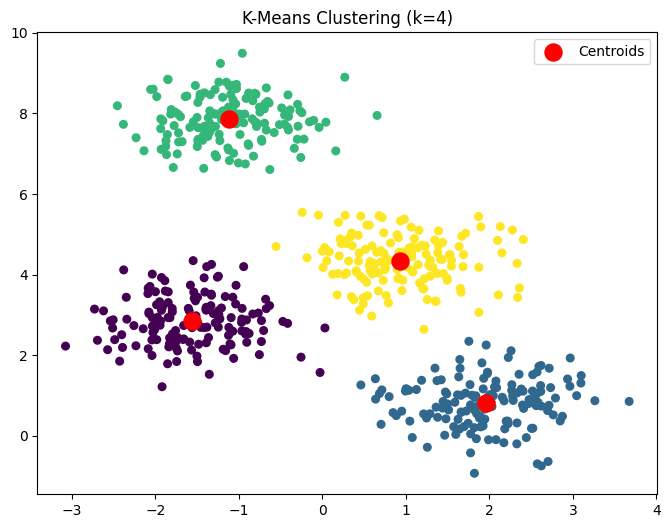

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate dataset
X, y = make_blobs(n_samples=600, centers=4, cluster_std=0.6, random_state=0)

# Train KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Get labels & centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters with centroids
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', label="Centroids" , s=150)
plt.legend()
plt.title("K-Means Clustering (k=4)")
plt.show()


## K-means clustering on diamond dataset

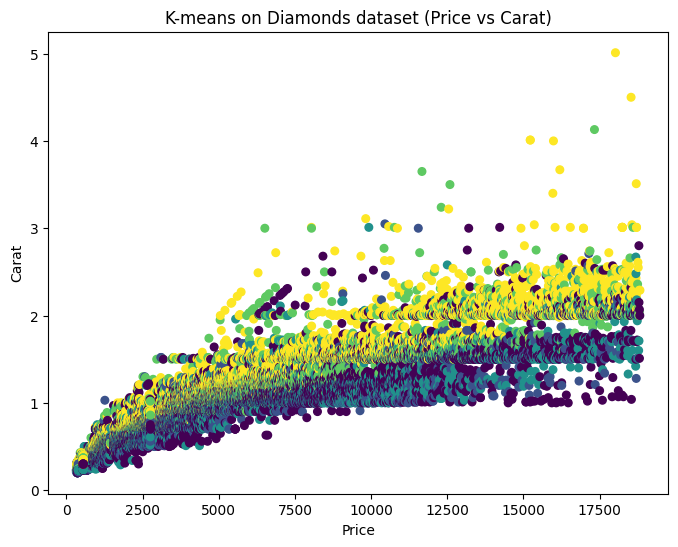

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#Load Dataset
df = sns.load_dataset('diamonds')

#Encode categorical columns
encoded = pd.get_dummies(df[['color', 'clarity', 'cut']])

#Concat both categorical and numeric columns
X = pd.concat([df[['carat', 'price']], encoded] , axis=1)

#Scaling 
scale = StandardScaler()
scaled_x = scale.fit_transform(X)

#KMean Training
kmeans = KMeans(n_clusters=5)

# Get labels
labels = kmeans.fit_predict(scaled_x)

# Plot (using price vs carat, colored by cluster)
plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['carat'], c=labels,  s=30)
plt.title('K-means on Diamonds dataset (Price vs Carat)')
plt.xlabel('Price')
plt.ylabel('Carat')
plt.show()


### Model Evaluation 
- 1 . Elbow method

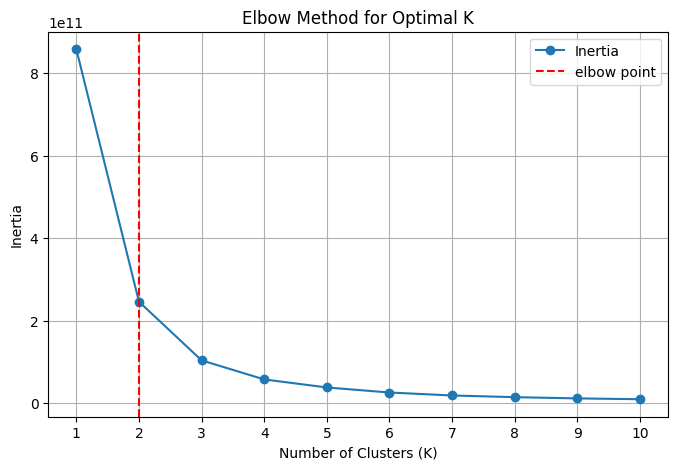

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = sns.load_dataset('diamonds')

X = df[['carat', 'table', 'price']]

k_value = range(1,11)
inertias = []

for k in k_value:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

#Find the Elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias) - 1)]
best_k = diff.index(max(diff)) + 2

plt.figure(figsize=(8,5))
plt.plot(k_value, inertias, marker='o', label='Inertia')
plt.axvline(best_k , color='red', linestyle='--', label='elbow point')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_value)
plt.grid(True)
plt.legend()
plt.show()

- 2. Silhouette method

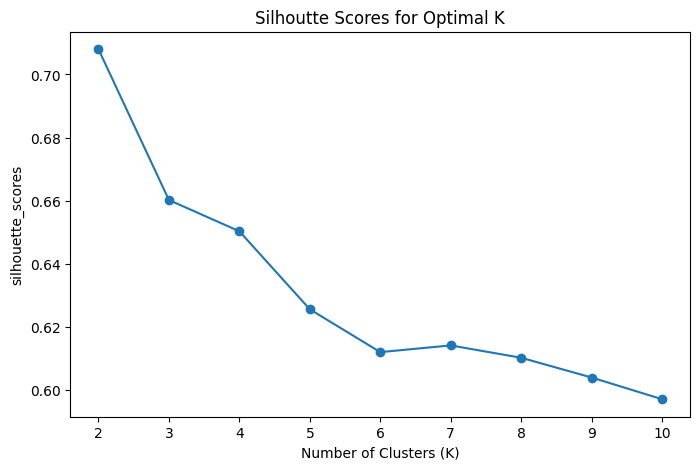

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = sns.load_dataset('diamonds')

X = df[['carat', 'table', 'price']]

k_value = range(2,11)
silhouette_scores = []

for k in k_value:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X , labels))


plt.figure(figsize=(8,5))
plt.plot(k_value, silhouette_scores, marker='o', label='Inertia')
plt.title("Silhoutte Scores for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("silhouette_scores")
plt.show()